In [2]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_run_times(fname):
    df = pd.read_csv(fname, sep=' ', names=['nproc', 'run_time'])
    mean = df.groupby('nproc').mean()
    return mean.index, mean['run_time']

# <time/image, nJob, nImt_total, sum of times around integrating method [1:], time between barriers>
tesla_k40 = [[0.001674, 1, 20000, 33.481865, 34.111491],
[0.001768, 2, 20000, 35.360796, 26.407722],
[0.003061, 3, 20000, 61.212053, 27.011321],
[0.004194, 4, 20000, 83.884677, 27.086772],
[0.005443, 5, 20000, 108.859609, 26.976704],
[0.005418, 6, 20000, 108.368892, 26.800089],
[0.008154, 7, 20000, 163.088283, 27.412142],
[0.008277, 8, 20000, 165.541118, 26.168195],
[0.009415, 9, 20000, 188.291876, 28.532914],
[0.009903, 10, 20000, 198.056117, 26.396390],
[0.008532, 11, 20000, 170.635726, 18.800277],
[0.007891, 12, 20000, 157.811901, 21.884899]]

titanx = [[0.000915, 1, 20000, 18.298608, 18.968870],
[0.000998, 2, 20000, 19.960036, 14.978898],
[0.001300, 3, 20000, 26.005034, 13.186680],
[0.001696, 4, 20000, 33.917359, 13.870572],
[0.002294, 5, 20000, 45.885732, 13.290274],
[0.002343, 6, 20000, 46.851221, 13.881406],
[0.003362, 7, 20000, 67.249678, 13.094694],
[0.003215, 8, 20000, 64.290585, 12.754625],
[0.004189, 9, 20000, 83.776932, 13.540348],
[0.004036, 10, 20000, 80.719557, 12.961495],
[0.005909, 11, 20000, 118.176092, 13.677849],
[0.004814, 12, 20000, 96.286309, 13.589672]]


<IPython.core.display.Javascript object>


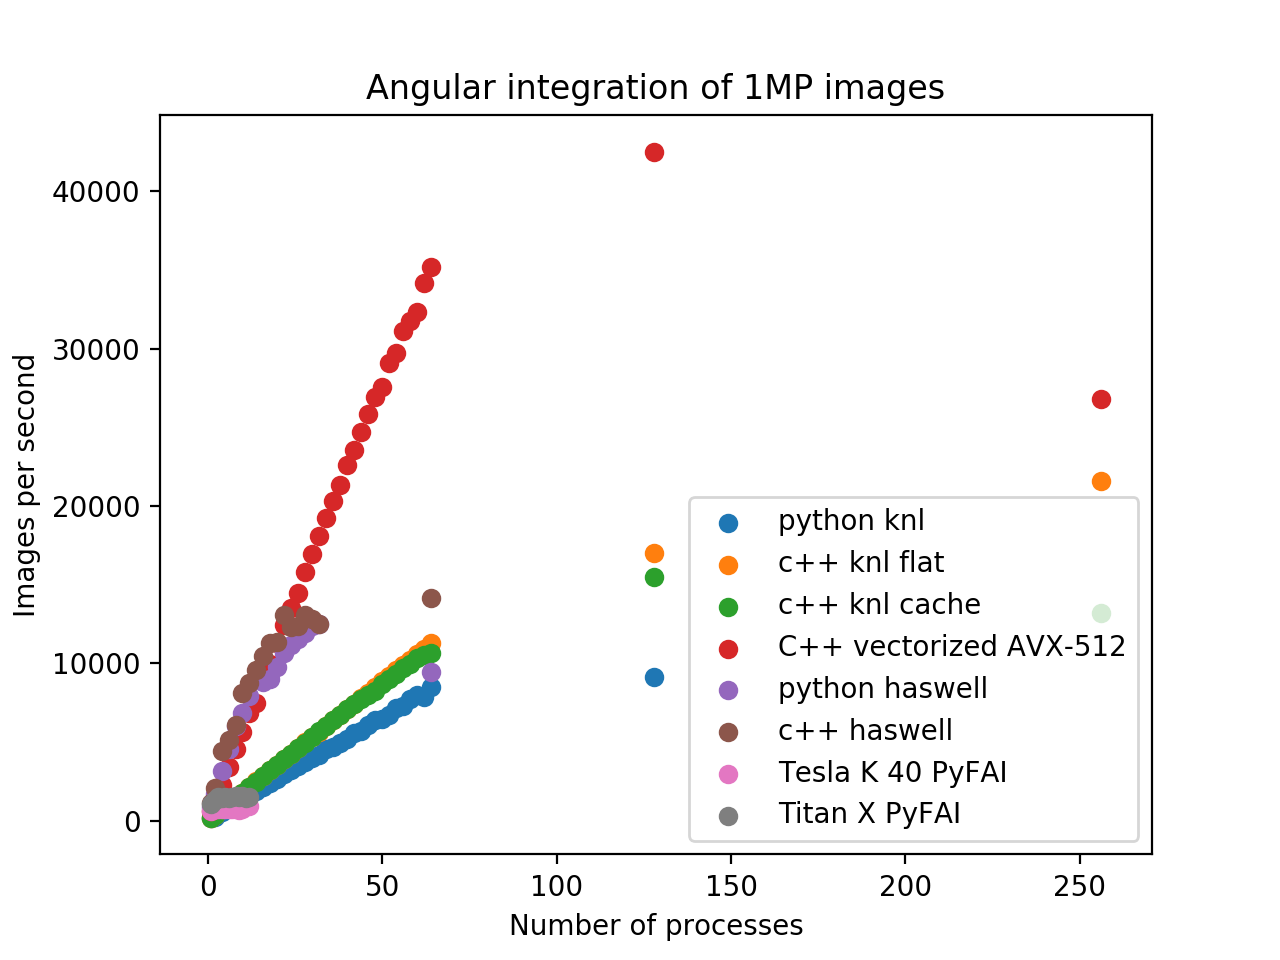

[1054.359063033275, 1335.2117091657879, 1516.6819851547166, 1441.901602904336, 1504.8598697062228, 1440.7762441355003, 1527.3361867027972, 1568.0586453933377, 1477.066911426501, 1543.0318801959188, 1462.2182186687394, 1471.7058660429773]


In [5]:
plt.figure()
file_names = ['results-python-knl.txt',
              'results-cpp-knl-flat.txt',
              'results-cpp-knl.txt',
              'results-cpp-knl-flat-vec.txt',
              'results-python-haswell.txt',
              'results-cpp-haswell.txt']

labels = ['python knl',
          'c++ knl flat',
          'c++ knl cache',
          'C++ vectorized AVX-512',
          'python haswell',
          'c++ haswell']

for i, fname in enumerate(file_names):
    nproc, run_time = get_run_times(os.path.join('output', fname))
    plt.scatter(nproc, 30 * nproc / run_time, label=labels[i])

nproc = [e[1] for e in tesla_k40]
time = [20000.0/e[4] for e in tesla_k40]
plt.scatter(nproc, time, label='Tesla K 40 PyFAI')

nproc = [e[1] for e in titanx]
time = [20000.0/e[4] for e in titanx]
plt.scatter(nproc, time, label='Titan X PyFAI')

plt.legend(loc='lower right')
plt.xlabel('Number of processes')
plt.ylabel('Images per second')
plt.title('Angular integration of 1MP images')
#plt.yscale('log')

print(time)
plt.savefig('benchmark.png', bbox_inches='tight', dpi=200)